# CNOT-Qiskit

In [8]:
from qiskit import QuantumCircuit, transpile
from qiskit.test.mock import FakeProvider

from qiskit.converters import circuit_to_dag
from qiskit.dagcircuit import DAGCircuit
from qiskit.providers import provider
import numpy as np
from qiskit.visualization import plot_circuit_layout

import model

In [11]:
print('List of backends:')
for be in FakeProvider().backends():
    config = be.configuration()
    print(config.backend_name, config.n_qubits)

List of backends:
fake_almaden 20
fake_armonk 1
fake_athens 5
fake_belem 5
fake_boeblingen 20
fake_bogota 5
fake_brooklyn 65
fake_burlington 5
fake_cambridge 28
fake_cambridge 28
fake_casablanca 7
fake_essex 5
fake_guadalupe 16
fake_jakarta 7
fake_johannesburg 20
fake_lagos 7
fake_lima 5
fake_london 5
fake_manila 5
fake_manhattan 65
fake_melbourne 14
fake_montreal 27
fake_mumbai 27
fake_openpulse_2q 2
fake_openpulse_3q 3
fake_ourense 5
fake_paris 27
fake_poughkeepsie 20
fake_qasm_simulator 5
fake_quito 5
fake_rochester 53
fake_rome 5
fake_rueschlikon 16
fake_santiago 5
fake_singapore 20
fake_sydney 27
fake_tenerife 5
fake_tokyo 20
fake_toronto 27
fake_valencia 5
fake_vigo 5
fake_yorktown 5


In [56]:
with open('cnotcount/Testing/16CNOT256_1.txt', 'r') as f:
       lines = f.readlines()

qu = int(lines[0].strip())

print(qu)
circ = QuantumCircuit(qu, 0)

for line in lines[1:]:
       line = line.strip().split(' ')
       if(line[0] == 'CNOT'):
              gate, qu1, qu2 = line
              qu1, qu2 = int(qu1), int(qu2)
              circ.cnot(qu1, qu2)
       else:
              gate, qu = line
              qu = int(qu)
              gate_map = {'X': circ.x, 'Y': circ.y, 'Z': circ.z,
                     'H': circ.h, 'T': circ.t, 'T+': circ.tdg,
                     'P': circ.s, 'P+': circ.sdg}
              gate_map[gate](qu)

16


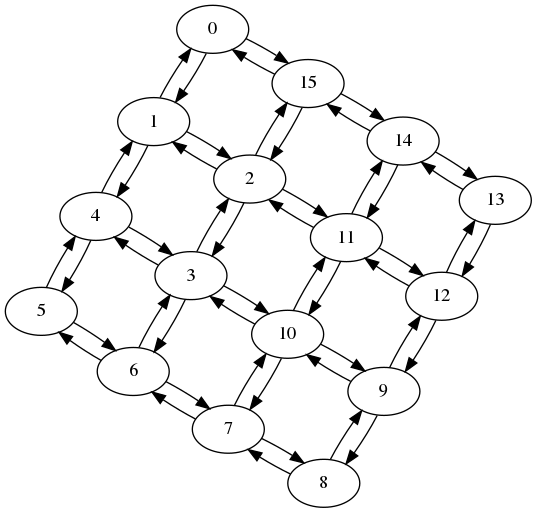

In [36]:
from qiskit.transpiler import CouplingMap

tokyo_20 = np.array([[1,2],[2,5],[5,6],[6,8],
[20,3],[3,4],[4,7],[7,9],
[19,16],[16,15],[15,12],[12,10],
[18,17],[17,14],[14,13],[13,11],
[1,20],[20,19],[19,18],
[2,3],[3,16],[16,17],
[5,4],[4,15],[15,14],
[6,7],[7,12],[12,13],
[8,9],[9,10],[10,11],
[2,4],[5,3],[6,9],[8,7],
[20,16],[3,19],[4,12],[7,15],
[16,14],[15,17],[12,11],[10,13]])-1



sq_16 = np.array([[1,2],[2,5],[5,6],
[16,3],[3,4],[4,7],
[15,12],[12, 11],[11, 8],
[14,13],[13,10],[9,10],
[1, 16],[16,15],[15,14],
[2,3],[3,12],[12, 13],
[5,4],[4,11],[11,10],
[6,7],[7,8],[8,9]])-1



coup = CouplingMap(sq_16)
coup.make_symmetric()
coup.draw()

In [75]:
backend = FakeProvider().get_backend('fake_guadalupe')
transpiled_circ = transpile(circ, coupling_map=coup,
              backend=backend, optimization_level=0, basis_gates=['x', 'y','z','t','tdg','s','sdg','cx','h'],
              layout_method='trivial')

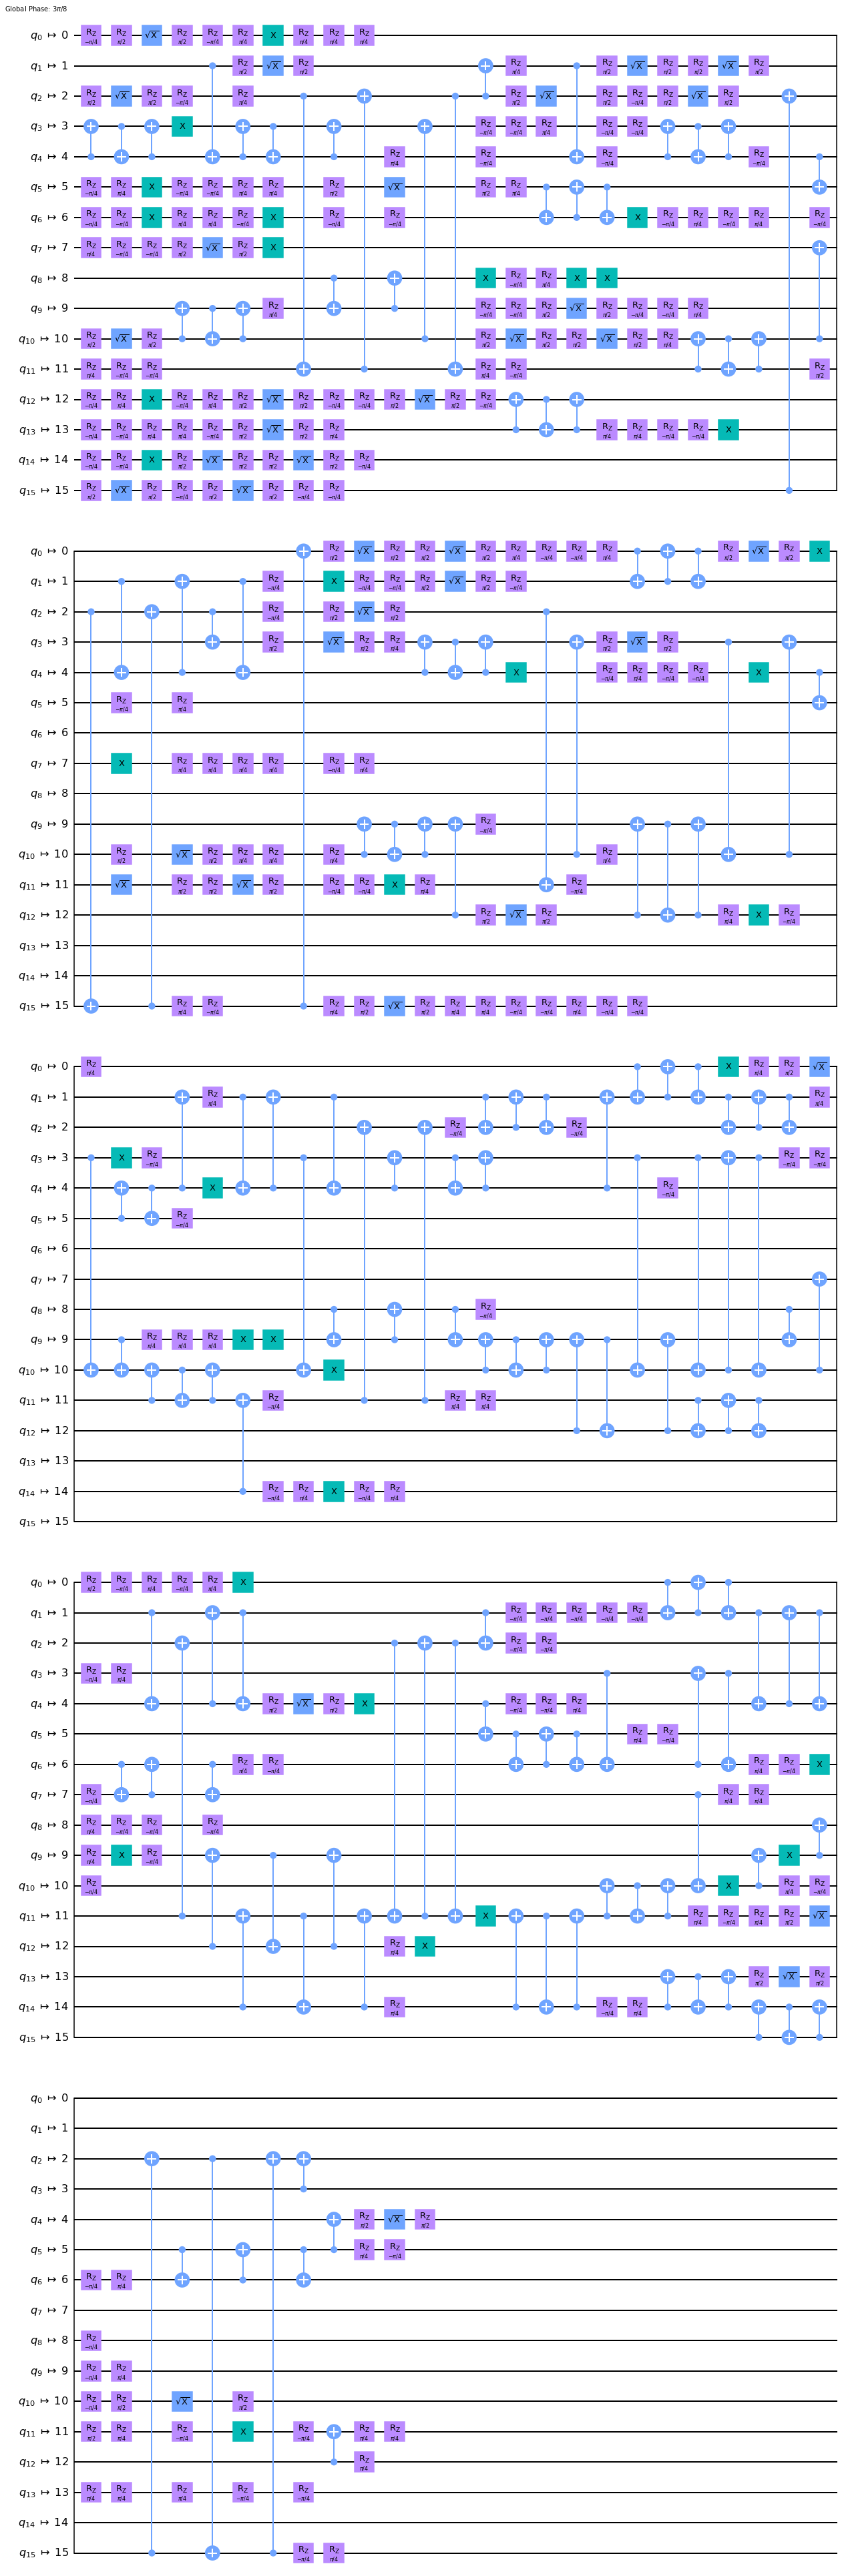

In [47]:
transpiled_circ.draw(output='mpl')

In [53]:
6 * (avg-1) * 32 = 109

SyntaxError: can't assign to operator (<ipython-input-53-43a55ee6beee>, line 1)

In [66]:
c_ops

{'h': 242, 't': 721, 'x': 229, 'tdg': 711, 'cx': 1522}

In [76]:
dag_circuit = circuit_to_dag(transpiled_circ)
c_ops = dag_circuit.count_ops()
print('CNOT count: ', c_ops['cx'])

CNOT count:  1408


In [49]:
dag_circuit = circuit_to_dag(circ)
c_ops = dag_circuit.count_ops()
print('Initial CNOT count: ', c_ops['cx'])

CNOT count:  32


In [ ]:
[[1,0], [1, 2], [0,2]]

In [2]:
from qiskit.providers.models import BackendConfiguration

In [78]:
with open('cnotcount/Testing/9CNOT3_1.txt', 'r') as f:
       lines = f.readlines()

qu = int(lines[0].strip())

print(qu)
circ = QuantumCircuit(qu, 0)

for line in lines[1:]:
       line = line.strip().split(' ')
       if(line[0] == 'CNOT'):
              gate, qu1, qu2 = line
              qu1, qu2 = int(qu1), int(qu2)
              circ.cnot(qu1, qu2)
       else:
              gate, qu = line
              qu = int(qu)
              gate_map = {'X': circ.x, 'Y': circ.y, 'Z': circ.z,
                     'H': circ.h, 'T': circ.t, 'T+': circ.tdg,
                     'P': circ.s, 'P+': circ.sdg}
              gate_map[gate](qu)

9


In [ ]:
import numpy as np
from qiskit import *
from qiskit import Aer

backend = Aer.get_backend('unitary_simulator')

job = execute(circ, backend)
result = job.result()


print(result.get_unitary(circ, decimals=3))

Operator([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
          ...,
          [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2, 2, 2, 2, 2, 2, 2, 2), output_dims=(2, 2, 2, 2, 2, 2, 2, 2, 2))


In [94]:
with open('cnotcount/Results/Results_9CNOT3_1.txt', 'r') as f:
       lines = f.readlines()

# qu = int(lines[0].strip())
qu = 9

print(qu)
circ = QuantumCircuit(qu, 0)

for line in lines[6:]:
       line = line.strip().split('[')
       if(line[0] == 'CNOT'):
              # gate, qu1, qu2 = line

              # print(line[1])
              qu1, qu2 = int(line[1][0])-1, int(line[1][3])-1
              circ.cnot(qu1, qu2)
       else:
              gate, qu = line
              # print(line)
              qu = int(qu[0])-1
              gate_map = {'X': circ.x, 'Y': circ.y, 'Z': circ.z,
                     'H': circ.h, 'T': circ.t, 'T+': circ.tdg,
                     'S': circ.s, 'S+': circ.sdg}
              gate_map[gate](qu)

9


In [95]:
# import numpy as np
# from qiskit import *
# from qiskit import Aer

backend = Aer.get_backend('unitary_simulator')

job = execute(circ, backend)
result = job.result()


print(result.get_unitary(circ, decimals=3))

Operator([[ 0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   , ...,
            0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ],
          [ 0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   , ...,
            0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ],
          [ 0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   , ...,
            0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ],
          ...,
          [ 0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   , ...,
            0.177-0.177j,  0.   +0.j   ,  0.177-0.177j],
          [ 0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   , ...,
            0.   +0.j   , -0.177+0.177j, -0.   -0.j   ],
          [ 0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   , ...,
            0.177-0.177j, -0.   -0.j   , -0.177+0.177j]],
         input_dims=(2, 2, 2, 2, 2, 2, 2, 2, 2), output_dims=(2, 2, 2, 2, 2, 2, 2, 2, 2))


In [82]:
unitary = result.get_unitary(circ, decimals=3)


22.641713009399204